In [69]:
import numpy as np
import matplotlib.pyplot as plt

# free particle with initial state as a Gaussian wave packet

In [99]:
L = 20
T = 1
N = 40
M = 40
x = np.linspace(-L, L, M)
dx = 2*L/(M-1)
dt = T/(N - 1 + 1)

In [102]:
k0 = 1
m = 1
psi_0 = (2 / np.pi)**(1/4) * np.exp(- x**2 + 1j * k0 * x)
K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
KpowerN = K
for i in range(N):
    KpowerN = KpowerN @ K # K^{N + 1}
psi_final = dx**(N + 1) * KpowerN @ psi_0

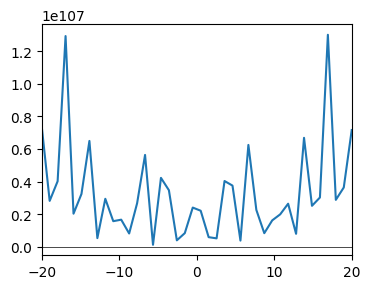

In [103]:
rho_final = (psi_final.real)**2 + (psi_final.imag)**2
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, rho_final)
ax.set_xlim(-L, L)
ax.axhline(y=0, linestyle='-', linewidth=0.5, color='black')
plt.show()

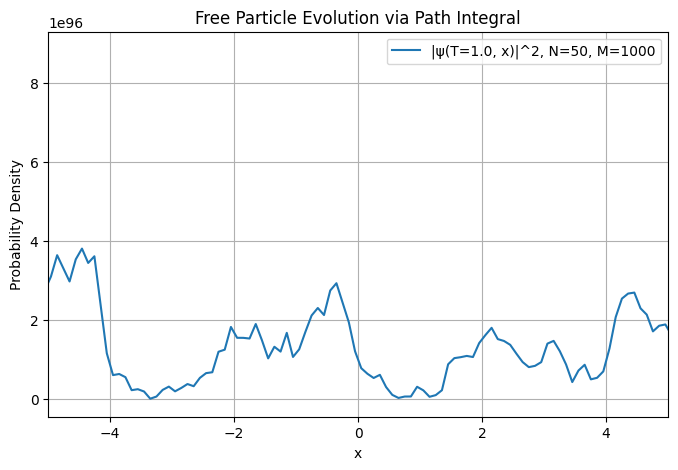

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50.0  # Increased spatial range to contain spreading wave function
T = 1.0   # Total time, as requested
N = 50  # Number of time steps (increased for accuracy)
M = 1000  # Number of spatial points (increased for accuracy)
m = 1.0   # Mass of the particle
k0 = 1.0  # Initial momentum

# Discretization
x = np.linspace(-L, L, M)
dx = x[1] - x[0]  # Spatial step size
dt = T / N        # Time step size

# Initial wave function (Gaussian wave packet)
psi = (2 / np.pi)**(1/4) * np.exp(-x**2 + 1j * k0 * x)

# Construct the short-time propagator matrix K
K = np.zeros((M, M), dtype=np.complex128)
for i in range(M):
    for j in range(M):
        K[i, j] = np.sqrt(m / (2 * np.pi * 1j * dt)) * np.exp(1j * m / (2 * dt) * (x[i] - x[j])**2)

# Time evolution: Apply K iteratively N times
for n in range(N):
    psi = K @ psi * dx

# Compute probability density
rho_final = np.abs(psi)**2

# Plot the result
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, rho_final, label=f'|ψ(T={T}, x)|^2, N={N}, M={M}')
ax.set_xlim(-L/10, L/10)
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Free Particle Evolution via Path Integral')
ax.legend()
ax.grid(True)
plt.show()